目标：

1. 找到本金的最佳退出时间

2. 找到安全的盈利空间

In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
pd.options.display.max_rows = 5000 
from datetime import datetime
from datetime import date

In [8]:
data = pd.read_excel(r'/Users/paxton615/Desktop/2020-2021.xlsx', )
col_names = ['company', 'ticker','w_price','w_duration','placing_date','total_raise', 'placing_price','recent_high','roi']
data.columns = col_names
data.head()

,company,ticker,w_price,w_duration,placing_date,total_raise,placing_price,recent_high,roi
0,Pensana,PRE,0.000,0,2021-06-01,13500000,1.200,1.85000,0.540000
1,Castillo Copper,CCZ,0.044,36,2021-06-01,1310250,0.023,0.02875,0.250000
2,IronRidge,IRR,0.000,0,2021-04-01,2150000,0.200,0.24400,0.220000
3,MetalNRG,MNRG,0.010,24,2021-03-01,1300000,0.006,0.01150,0.916667
4,AMTE Power,AMTE,0.000,0,2021-03-01,3000000,1.750,3.27000,0.868571


In [26]:
data.loc[data['roi']<10].describe()

,w_price,w_duration,total_raise,placing_price,recent_high,roi
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000
mean,0.019517,16.200000,2.279768e+06,0.211983,0.507377,1.785995
std,0.030873,16.003017,2.990454e+06,0.400001,0.996313,1.866144
min,0.000000,0.000000,9.500000e+04,0.005000,0.011500,0.187500
25%,0.000000,0.000000,3.725000e+05,0.015500,0.036750,0.550833
50%,0.010000,24.000000,1.200000e+06,0.043750,0.100250,1.146667
75%,0.030000,34.500000,2.166500e+06,0.177500,0.298000,2.421474
max,0.120000,36.000000,1.350000e+07,1.750000,3.270000,7.400000


In [27]:
data.loc[data['roi']<5].describe()

,w_price,w_duration,total_raise,placing_price,recent_high,roi
count,27.000000,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,0.020944,15.777778,2.284261e+06,0.232648,0.544789,1.264923
std,0.032239,16.060782,3.026057e+06,0.417061,1.043735,0.986767
min,0.000000,0.000000,9.500000e+04,0.006000,0.011500,0.187500
25%,0.000000,0.000000,4.150000e+05,0.017500,0.035000,0.530870
50%,0.010000,24.000000,1.300000e+06,0.060000,0.138000,1.000000
75%,0.030000,33.000000,2.161000e+06,0.230000,0.287000,1.724359
max,0.120000,36.000000,1.350000e+07,1.750000,3.270000,3.458078


In [28]:
data.loc[data['roi']<3].describe()

,w_price,w_duration,total_raise,placing_price,recent_high,roi
count,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000
mean,0.022620,17.040000,2.369256e+06,0.192580,0.326772,1.089471
std,0.032962,16.032467,3.129666e+06,0.407257,0.715370,0.788643
min,0.000000,0.000000,9.500000e+04,0.006000,0.011500,0.187500
25%,0.000000,0.000000,3.300000e+05,0.017000,0.035000,0.521739
50%,0.010000,24.000000,1.300000e+06,0.027500,0.062500,0.978947
75%,0.030000,36.000000,2.172000e+06,0.110000,0.244000,1.588235
max,0.120000,36.000000,1.350000e+07,1.750000,3.270000,2.785714


In [29]:
data.loc[data['roi']<2].describe()

,w_price,w_duration,total_raise,placing_price,recent_high,roi
count,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,0.017833,14.571429,2.533774e+06,0.223976,0.369729,0.819505
std,0.028326,16.163451,3.296282e+06,0.438681,0.774718,0.511166
min,0.000000,0.000000,2.150000e+05,0.006000,0.011500,0.187500
25%,0.000000,0.000000,3.300000e+05,0.020000,0.030000,0.254545
50%,0.000000,0.000000,1.300000e+06,0.060000,0.138000,0.868571
75%,0.030000,30.000000,2.172000e+06,0.200000,0.244000,1.166667
max,0.120000,36.000000,1.350000e+07,1.750000,3.270000,1.833333


In [30]:
data.loc[data['roi']<2]

,company,ticker,w_price,w_duration,placing_date,total_raise,placing_price,recent_high,roi
0,Pensana,PRE,0.0000,0,2021-06-01,13500000,1.2000,1.85000,0.540000
1,Castillo Copper,CCZ,0.0440,36,2021-06-01,1310250,0.0230,0.02875,0.250000
2,IronRidge,IRR,0.0000,0,2021-04-01,2150000,0.2000,0.24400,0.220000
3,MetalNRG,MNRG,0.0100,24,2021-03-01,1300000,0.0060,0.01150,0.916667
4,AMTE Power,AMTE,0.0000,0,2021-03-01,3000000,1.7500,3.27000,0.868571
5,Chaarat Gold,CGH,0.0000,0,2021-02-01,2172000,0.2600,0.30900,0.188462
7,Advanced Oncotherapy,AVO,0.0000,0,2021-01-01,5900000,0.4000,0.47500,0.187500
8,Katoro Gold,KAT,0.0300,36,2021-01-01,960000,0.0200,0.02480,0.240000
9,Panther Metals,PALM,0.0000,0,2020-12-01,300000,0.1000,0.17000,0.700000
10,Kavango Resources,KAV,0.0425,30,2020-12-01,2000000,0.0275,0.06200,1.254545


In [ ]:
# sns.set_theme(style="white", context="talk")
# rs = np.random.RandomState(8)

# # Set up the matplotlib figure
# f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# # Generate some sequential data
# x = np.array(list("ABCDEFGHIJ"))
# y1 = np.arange(1, 11)
# sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Sequential")

# # Center the data to make it diverging
# y2 = y1 - 5.5
# sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
# ax2.axhline(0, color="k", clip_on=False)
# ax2.set_ylabel("Diverging")

# # Randomly reorder the data to make it qualitative
# y3 = rs.choice(y1, len(y1), replace=False)
# sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
# ax3.axhline(0, color="k", clip_on=False)
# ax3.set_ylabel("Qualitative")

# # Finalize the plot
# sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)

In [22]:
data.loc[data['ticker']=='ECR']

,company,ticker,w_price,w_duration,placing_date,total_raise,placing_price,recent_high,roi
16,ECR Minerals,ECR,0.021,24,2020-07-01,500000,0.013,0.0425,2.269231
22,ECR Minerals,ECR,0.010,24,2020-04-01,500000,0.005,0.0420,7.400000


In [24]:
data.loc[data['ticker']=='ECR'].roi.mean()

4.834615384615385

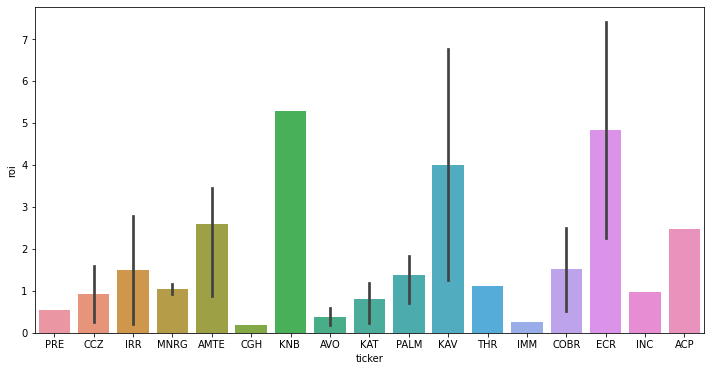

In [20]:
fig = plt.figure(figsize=(12,6))
x = data.loc[data['roi']<10].ticker
y = data.loc[data['roi']<10].roi
sns.barplot(x=x, y=y);

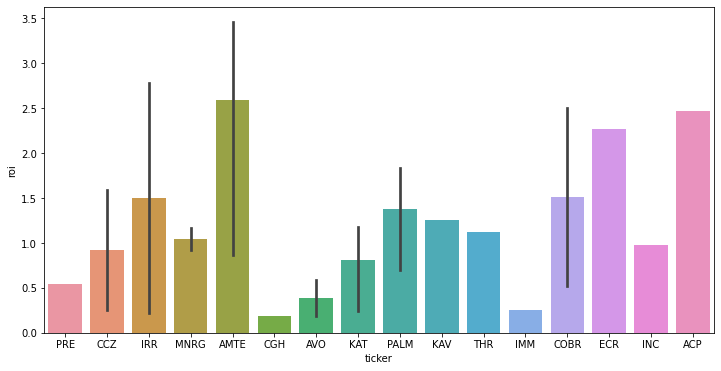

In [21]:
fig = plt.figure(figsize=(12,6))
x = data.loc[data['roi']<5].ticker
y = data.loc[data['roi']<5].roi
sns.barplot(x=x, y=y);

In [32]:
url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/irr.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

irr = requests.request("GET", url, headers=headers)

In [33]:
irr = irr.text

In [34]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [37]:
irr_date = get_dates(irr)
irr_close = get_close(irr)

In [38]:
print(irr_date[-1])
print(irr_close[-1])

2021-10-12
18.6
